## 자연어 처리 위한 형태 분석기 적용
- 불용어 처리 

In [21]:
from wordcloud import WordCloud

In [1]:
# 한글 문장 리스트
sentences = [
    "오늘 날씨가 좋아서 나들이 가고 싶다.",
    "이 영화는 정말 재미있었어요.",
    "맛있는 음식을 먹으러 갈까요?",
    "운동을 하면 건강에 좋아지는 것 같아요.",
    "공부하기 싫어서 미루고 있어요.",
    "여행 계획을 세우고 있는데 어디로 갈까요?",
    "좋은 책을 읽으면 마음이 편안해져요.",
    "오늘은 친구들과 만나서 재미있게 놀았어요.",
    "새로운 언어를 배우는 것은 어려워도 흥미로워요.",
    "주말에 가족들과 함께 시간을 보내기로 했습니다."
]

## 자연어 처리 위한 형태 분석기 적용 

In [2]:
from mecab import MeCab
mecab = MeCab()

In [3]:
# 명사만 추출 / pos 품사 파악 
mecab.nouns(sentences[0]) # mecab.pos(sentences[0])

['날씨', '나']

In [4]:
# 형태분석기 사용해 명사만 추출 
morphs_list = list()
for sentence in sentences:
    morphs = mecab.nouns(sentence)
    morphs_list.append(morphs)
morphs_list # 2차원 

[['날씨', '나'],
 ['영화'],
 ['음식'],
 ['운동', '건강', '것'],
 ['공부'],
 ['여행', '계획', '어디'],
 ['책', '마음', '편안'],
 ['오늘', '친구'],
 ['언어', '것', '흥미'],
 ['주말', '가족', '시간']]

In [5]:
morphs_list = list()
for sentence in sentences:
    morphs = mecab.nouns(sentence)
    morphs_list = morphs_list + morphs
morphs_list #1차원으로 추출 

['날씨',
 '나',
 '영화',
 '음식',
 '운동',
 '건강',
 '것',
 '공부',
 '여행',
 '계획',
 '어디',
 '책',
 '마음',
 '편안',
 '오늘',
 '친구',
 '언어',
 '것',
 '흥미',
 '주말',
 '가족',
 '시간']

In [9]:
# 문장으로 합치기
text = ' '.join(morphs_list)
text

'날씨 나 영화 음식 운동 건강 것 공부 여행 계획 어디 책 마음 편안 오늘 친구 언어 것 흥미 주말 가족 시간'

In [11]:
## 분석에 의미없는 한글자 처리
import re
pattern = r'[나것]'
morphs_list = re.sub(pattern=pattern, repl='', string=text) # params : 변경대상, 대상 대체, 어떤것을
morphs_list

'날씨  영화 음식 운동 건강  공부 여행 계획 어디 책 마음 편안 오늘 친구 언어  흥미 주말 가족 시간'

In [13]:
# counter를 이용해서 중복 여부 count
from collections import Counter
nouns_count = Counter(morphs_list)
nouns_count

Counter({'날': 1,
         '씨': 1,
         ' ': 21,
         '영': 1,
         '화': 1,
         '음': 2,
         '식': 1,
         '운': 1,
         '동': 1,
         '건': 1,
         '강': 1,
         '공': 1,
         '부': 1,
         '여': 1,
         '행': 1,
         '계': 1,
         '획': 1,
         '어': 2,
         '디': 1,
         '책': 1,
         '마': 1,
         '편': 1,
         '안': 1,
         '오': 1,
         '늘': 1,
         '친': 1,
         '구': 1,
         '언': 1,
         '흥': 1,
         '미': 1,
         '주': 1,
         '말': 1,
         '가': 1,
         '족': 1,
         '시': 1,
         '간': 1})

In [23]:
# 한글 폰트 경로 설정 (Windows 환경에 맞게 경로 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'

wordCloud = WordCloud(font_path=font_path, background_color='white') #인스턴스화 
wordCloud.generate_from_frequencies(nouns_count)

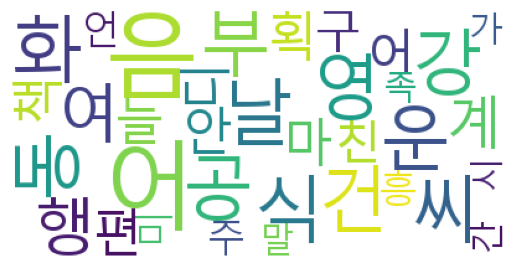

In [24]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off') 
plt.show()